In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

# 0.Data Load
---

In [16]:
df_prod = pd.read_csv("../LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv", low_memory=False)
df_prod.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [17]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   pd_c          1933 non-null   object
 1   pd_nm         1933 non-null   object
 2   clac_hlv_nm   1933 non-null   object
 3   clac_mcls_nm  1933 non-null   object
dtypes: object(4)
memory usage: 60.5+ KB


# 1.Values
---

In [18]:
# Number of Unique Values
for col in df_prod.columns:
    unq_arr = df_prod[col].unique()
    print(f"{col}: {df_prod[col].nunique()}\t{['*']+unq_arr[:10] if df_prod[col].nunique()>20 else unq_arr}")
    print()
print(f"Total DF Length: {len(df_prod)}")

pd_c: 1933	['*PD0001' '*PD0002' '*PD0003' '*PD0004' '*PD0005' '*PD0006' '*PD0007'
 '*PD0008' '*PD0009' '*PD0010']

pd_nm: 1932	['*소파' '*스툴/리빙의자' '*탁자' '*장식장/진열장' '*기타가구' '*책상' '*책상의자' '*책장'
 '*사무용/학생용가구세트' '*선반장/행거']

clac_hlv_nm: 60	['*가구' '*건강식품' '*건강용품' '*건해산물' '*계절가전' '*공구/안전용품' '*과일' '*과자' '*구기/필드스포츠'
 '*금융/보험서비스']

clac_mcls_nm: 349	['*거실가구' '*기타가구' '*사무용/학생용가구' '*수납가구' '*시공/DIY가구' '*야외용가구' '*유아동가구'
 '*주방가구' '*침실가구' '*건강보조식품']

Total DF Length: 1933


In [63]:
df_prod["pd_nm"].value_counts()[:5]

기타       2
소파       1
즉석젓갈류    1
카놀라유     1
포도씨유     1
Name: pd_nm, dtype: int64

In [19]:
# Missing Value
df_prod.isna().sum()

pd_c            0
pd_nm           0
clac_hlv_nm     0
clac_mcls_nm    0
dtype: int64

In [34]:
df_h = df_prod.groupby(by=["clac_hlv_nm","clac_mcls_nm"], as_index=False).count()[["clac_hlv_nm","clac_mcls_nm"]]


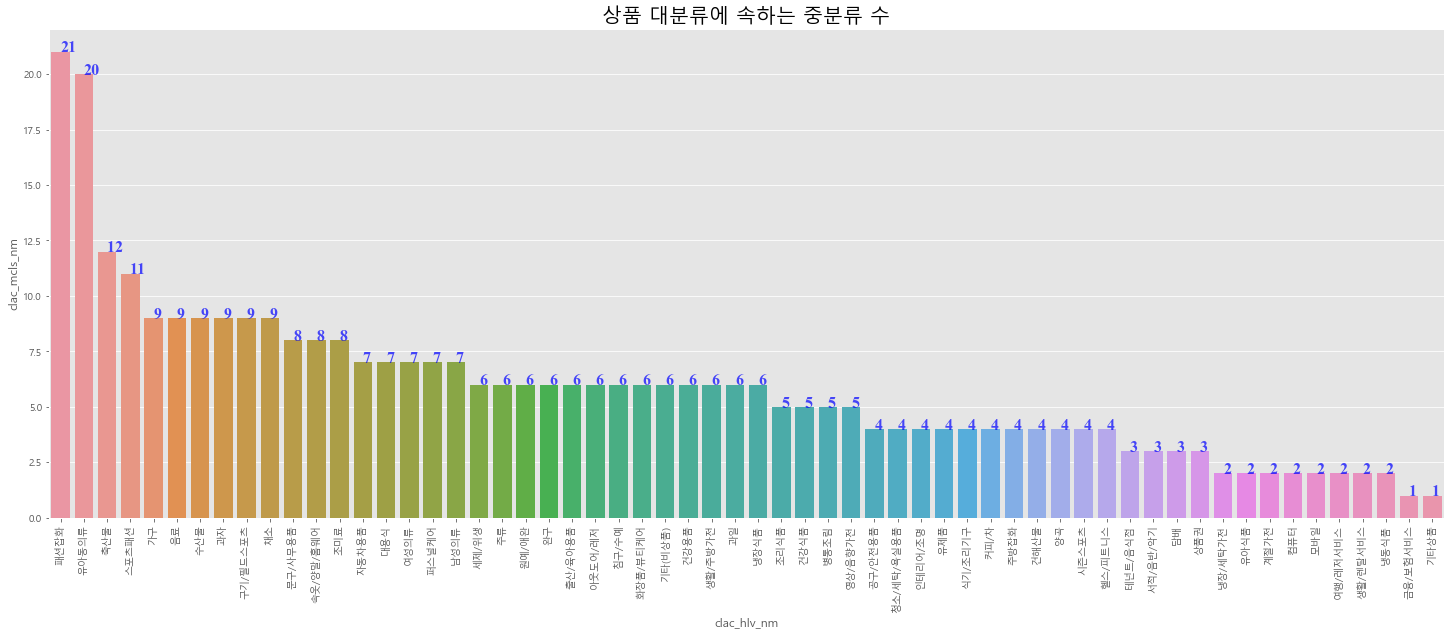

In [103]:
plt.rcParams["figure.figsize"] = (25,9)
df_ord = df_h.groupby(by="clac_hlv_nm", as_index=False).count().sort_values(by="clac_mcls_nm", ascending=False)
sns.barplot(x=df_ord["clac_hlv_nm"], y=df_ord["clac_mcls_nm"])
plt.xticks(rotation=90)
plt.title("상품 대분류에 속하는 중분류 수", size=20)
wid = 0.003
for cnt in df_ord["clac_mcls_nm"]:
    plt.text(x=wid, y=cnt, s=f"{cnt}",
             fontdict={'family': 'Times New Roman',
                       'color':  'blue',
                       'weight': 'bold',
                       'size': 16,
                       'alpha': 0.7})
    wid+=1
plt.show()

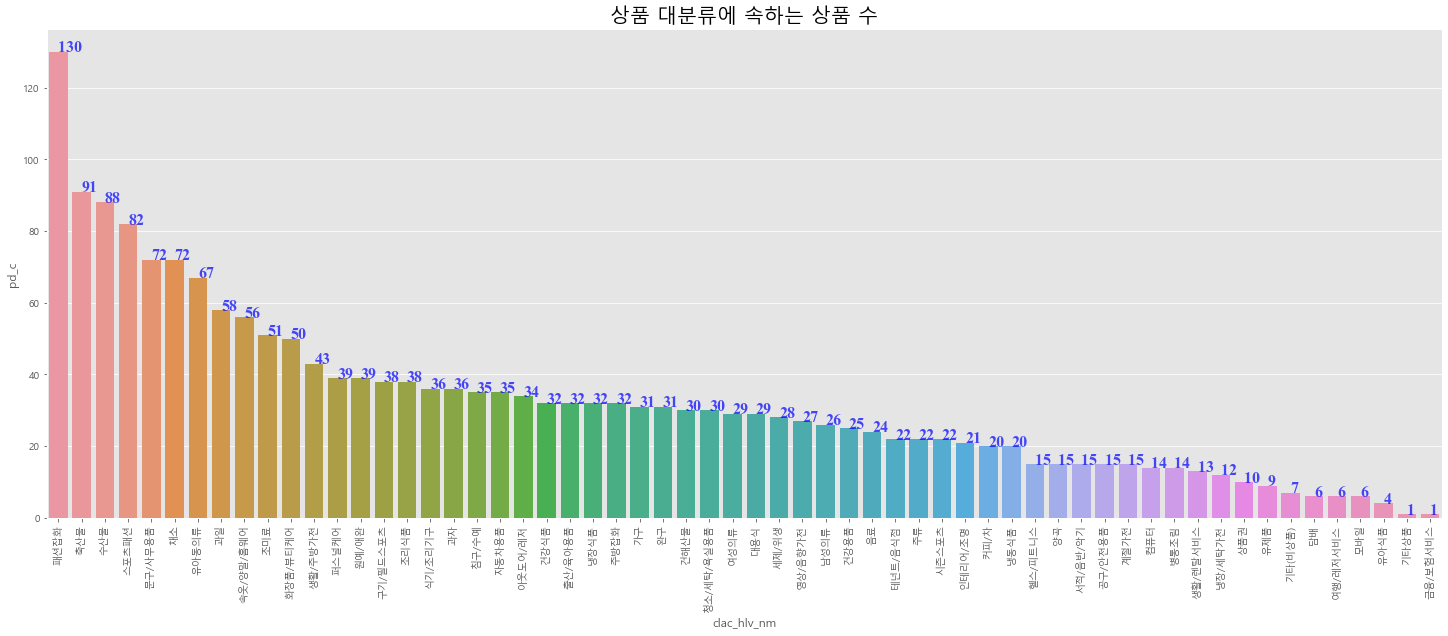

In [107]:
plt.rcParams["figure.figsize"] = (25,9)
df_ord = df_prod.groupby(by="clac_hlv_nm", as_index=False).count().sort_values(by="clac_mcls_nm", ascending=False)
sns.barplot(x=df_ord["clac_hlv_nm"], y=df_ord["pd_c"])
plt.xticks(rotation=90)
plt.title("상품 대분류에 속하는 상품 수", size=20)
wid = 0.003
for cnt in df_ord["clac_mcls_nm"]:
    plt.text(x=wid, y=cnt, s=f"{cnt}",
             fontdict={'family': 'Times New Roman',
                       'color':  'blue',
                       'weight': 'bold',
                       'size': 16,
                       'alpha': 0.7})
    wid+=1
plt.show()